In [41]:
suppressMessages(library(Autotuner))
suppressMessages(library(xcms))
suppressMessages(library(dplyr))

In [42]:
## input metadata for samples you'll run Autotuner on
# load metadata
metadata <- read.delim("metadata_neg.txt", header = T)
# idx for pool samples only
idx <- grep("BIOSSCOPE pool",metadata$Sample.Name)
# keep every four (don't need to run autotuner on all 100+ pool samples)
idx<-idx[seq(1, length(idx), 4)]
idx<-idx[-c(2,4,6,8,11,21,24,25,26)]
# keep only the samples you'll be running 
metadata <- metadata[idx,]
dim(metadata)
# add a column for description on plots later
metadata$Sample <- gsub(pattern = "mtab_BIOSSCOPE_exometab_", replacement = "", metadata$File.Name)

## input raw data
ionMode <- "neg"
ext <- ".mzML"
usePath <- "/vortexfs1/omics/kujawinski/data/biosscope_untarg_mzml"
# list all files
rawPaths <- list.files(path=usePath, pattern=glob2rx(paste0("*",ionMode,"*",ext)), full.names = TRUE)
# index for only samples you'll use
rawPaths <- rawPaths[which(gsub(".mzML","",basename(rawPaths)) %in% metadata$File.Name)]

## Check you subsetted correctly
if(!dim(metadata)[1] == length(rawPaths)){stop("Subset sequence file incorrectly")}
print(paste0("Autotuner will be running the following ", length(rawPaths),"pool samples:"))
metadata

[1] 17 10

[1] "Autotuner will be running the following 17pool samples:"


,Sample.Type,File.Name,Path,Instrument.Method,Position,Inj.Vol,Sample.Name,ionMode,goodData,FileWithExtension,Sample
,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<chr>
1,Unknown,mtab_BIOSSCOPE_exometab_neg1_031820_013,D:\Kujawinski_FTMSFUSION2\2020_0318 BIOSSCOPE_exometab_neg1,C:\Xcalibur\methods\Training\UPLC_neg_HCD_OT_062018_noIC_MS2_7p5k,B:A3,5,BIOSSCOPE pool neg,neg,1,mtab_BIOSSCOPE_exometab_neg1_031820_013.mzML,neg1_031820_013
39,Unknown,mtab_BIOSSCOPE_exometab_neg1_031820_051,D:\Kujawinski_FTMSFUSION2\2020_0318 BIOSSCOPE_exometab_neg1,C:\Xcalibur\methods\Training\UPLC_neg_HCD_OT_062018_noIC_MS2_7p5k,B:A3,5,BIOSSCOPE pool neg,neg,1,mtab_BIOSSCOPE_exometab_neg1_031820_051.mzML,neg1_031820_051
87,Unknown,mtab_BIOSSCOPE_exometab_neg1_031820_099,D:\Kujawinski_FTMSFUSION2\2020_0318 BIOSSCOPE_exometab_neg1,C:\Xcalibur\methods\Training\UPLC_neg_HCD_OT_062018_noIC_MS2_7p5k,B:A3,5,BIOSSCOPE pool neg,neg,1,mtab_BIOSSCOPE_exometab_neg1_031820_099.mzML,neg1_031820_099
114,Unknown,mtab_BIOSSCOPE_exometab_neg2_031920_021,D:\Kujawinski_FTMSFUSION2\2020_0319 BIOSSCOPE_exometab_neg2,C:\Xcalibur\methods\Training\UPLC_neg_HCD_OT_062018_noIC_MS2_7p5k,B:A3,5,BIOSSCOPE pool neg,neg,1,mtab_BIOSSCOPE_exometab_neg2_031920_021.mzML,neg2_031920_021
162,Unknown,mtab_BIOSSCOPE_exometab_neg2_031920_069,D:\Kujawinski_FTMSFUSION2\2020_0319 BIOSSCOPE_exometab_neg2,C:\Xcalibur\methods\Training\UPLC_neg_HCD_OT_062018_noIC_MS2_7p5k,B:A3,5,BIOSSCOPE pool neg,neg,1,mtab_BIOSSCOPE_exometab_neg2_031920_069.mzML,neg2_031920_069
186,Unknown,mtab_BIOSSCOPE_exometab_neg2_031920_093,D:\Kujawinski_FTMSFUSION2\2020_0319 BIOSSCOPE_exometab_neg2,C:\Xcalibur\methods\Training\UPLC_neg_HCD_OT_062018_noIC_MS2_7p5k,B:A3,5,BIOSSCOPE pool neg,neg,1,mtab_BIOSSCOPE_exometab_neg2_031920_093.mzML,neg2_031920_093
213,Unknown,mtab_BIOSSCOPE_exometab_neg3_032120_015,D:\Kujawinski_FTMSFUSION2\2020_0321 BIOSSCOPE_exometab_neg3,C:\Xcalibur\methods\Training\UPLC_neg_HCD_OT_062018_noIC_MS2_7p5k,B:A3,5,BIOSSCOPE pool neg,neg,1,mtab_BIOSSCOPE_exometab_neg3_032120_015.mzML,neg3_032120_015
237,Unknown,mtab_BIOSSCOPE_exometab_neg3_032120_039,D:\Kujawinski_FTMSFUSION2\2020_0321 BIOSSCOPE_exometab_neg3,C:\Xcalibur\methods\Training\UPLC_neg_HCD_OT_062018_noIC_MS2_7p5k,B:A3,5,BIOSSCOPE pool neg,neg,1,mtab_BIOSSCOPE_exometab_neg3_032120_039.mzML,neg3_032120_039
261,Unknown,mtab_BIOSSCOPE_exometab_neg3_032120_063,D:\Kujawinski_FTMSFUSION2\2020_0321 BIOSSCOPE_exometab_neg3,C:\Xcalibur\methods\Training\UPLC_neg_HCD_OT_062018_noIC_MS2_7p5k,B:A3,5,BIOSSCOPE pool neg,neg,1,mtab_BIOSSCOPE_exometab_neg3_032120_063.mzML,neg3_032120_063


In [43]:
## Create Autotuner object
Autotuner <- createAutotuner(rawPaths,metadata,file_col = "File.Name",factorCol = "Sample")

~~~ Autotuner: Initializator ~~~ 


~~~ Parsing Raw Data into R ~~~ 


~~~ Extracting the Raw Data from Individual Samples ~~~ 


~~~ Storing Everything in Autotuner Object ~~~ 


~~~ The Autotuner Object has been Created ~~~ 




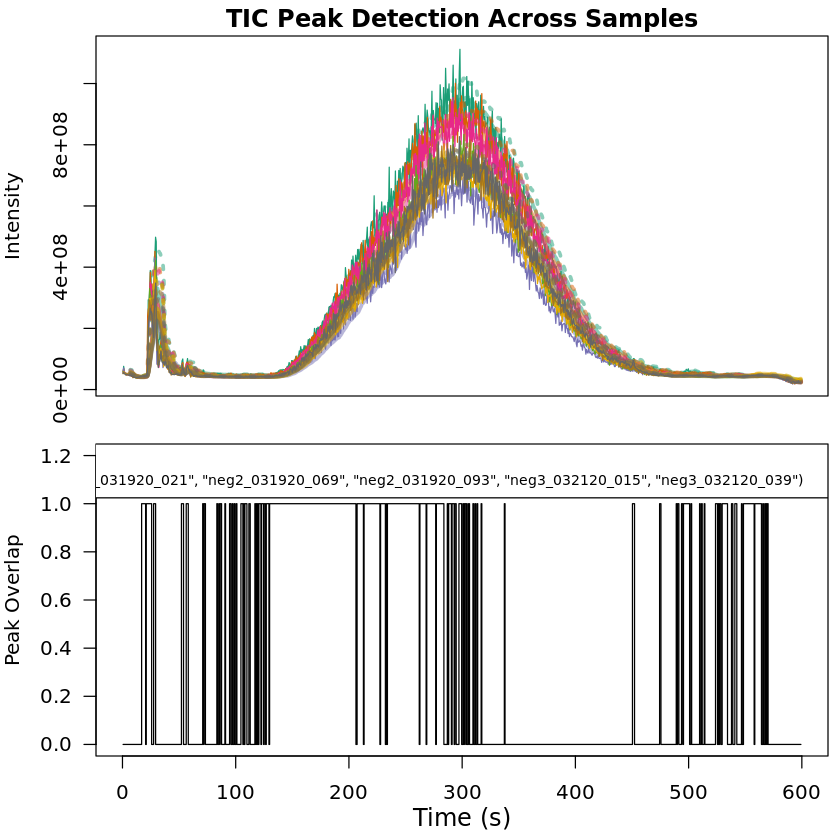

In [44]:
## Sliding window analysis
# The user should play with the lag, threshold, and influence parameters to perform the sliding window analysis:

# Lag - The number of chromatographic scan points used to test if next point is significant 
# (i.e. the size number of points making up the moving average).
lag <- 12

# Threshold - A numerical constant representing how many times greater the intensity of an adjacent scan has to be 
# from the scans in the sliding window to be considered significant.
threshold<- 1.5

# Influence - A numerical factor used to scale the magnitude of a significant scan once it has been added to the 
# sliding window.
influence <- 0.5
signals <- lapply(getAutoIntensity(Autotuner), ThresholdingAlgo, lag, threshold, influence)

# Plot sliding window results
plot_signals(Autotuner,threshold, 
             ## index for which data files should be displayed
             sample_index = 1:dim(metadata)[1], signals = signals)
# Top Plot: The chromatotgraphic trace for each sample (solid line) along with 
# the noise associated with each sample (dashed line).
# Bottom Plot: A signal plot used to indicate which chromatographic regions have peaks.

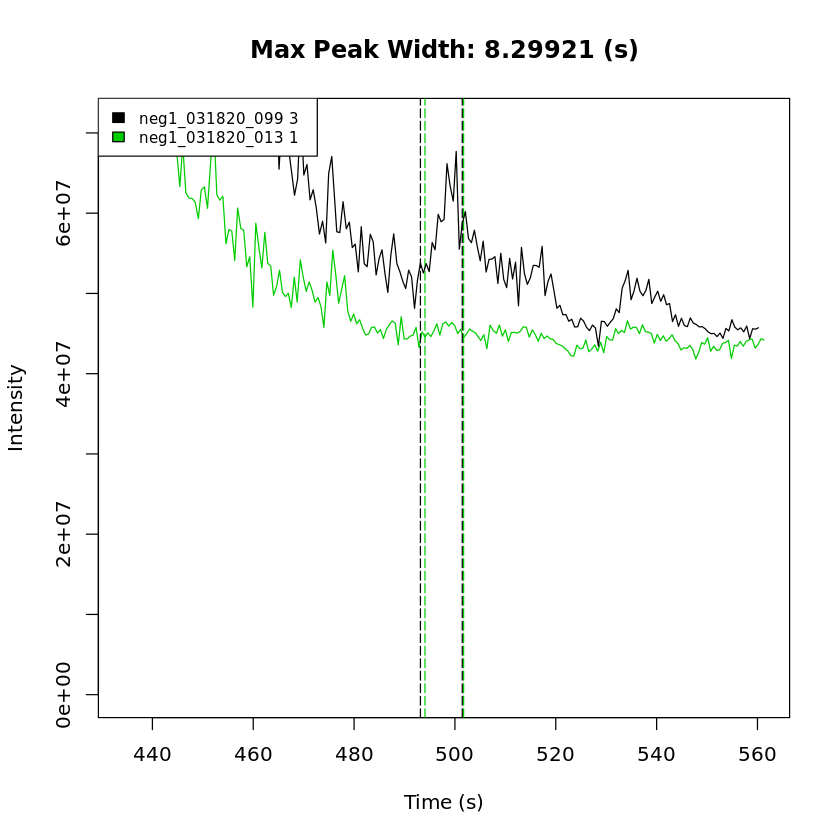

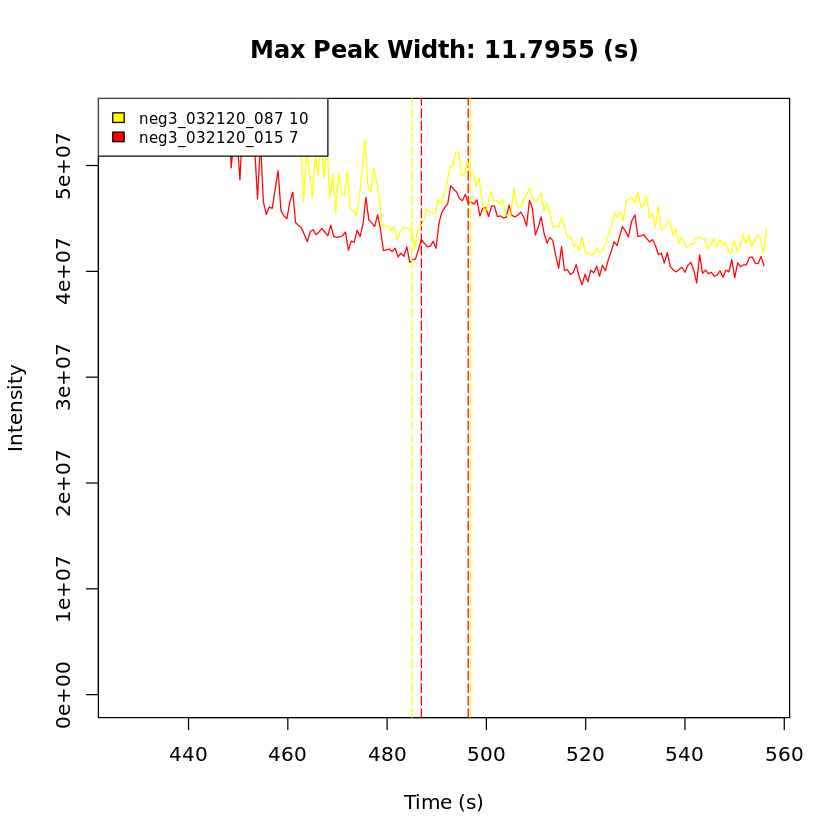

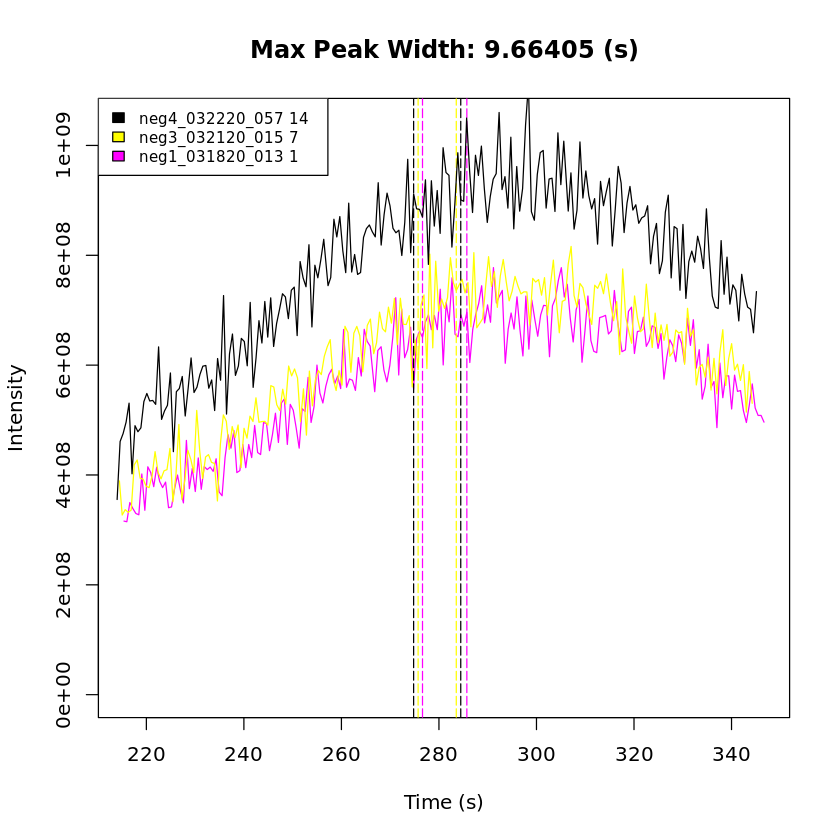

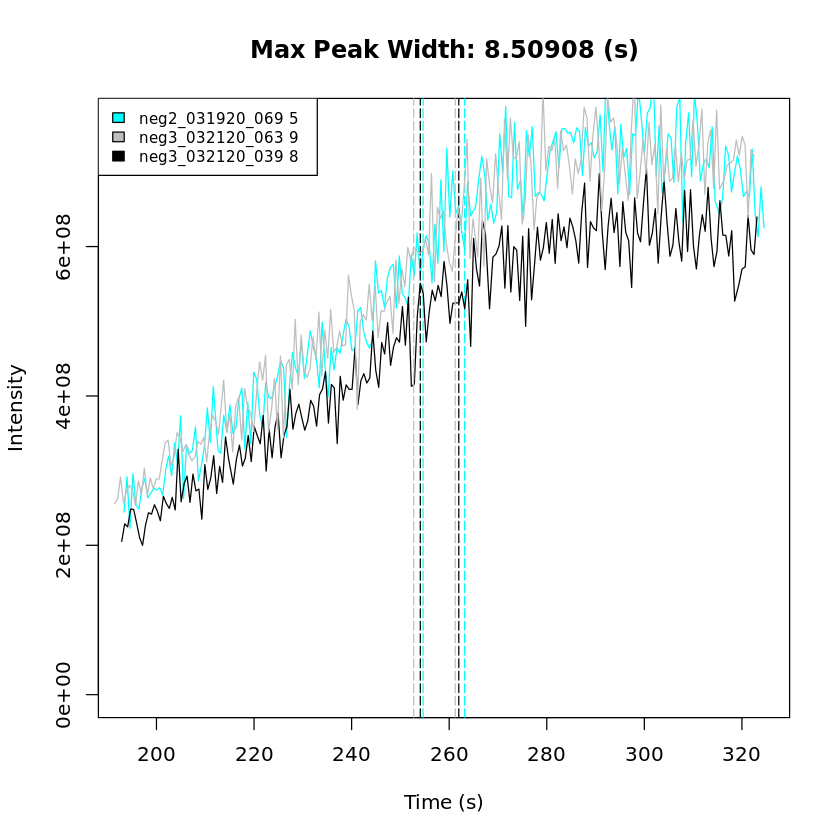

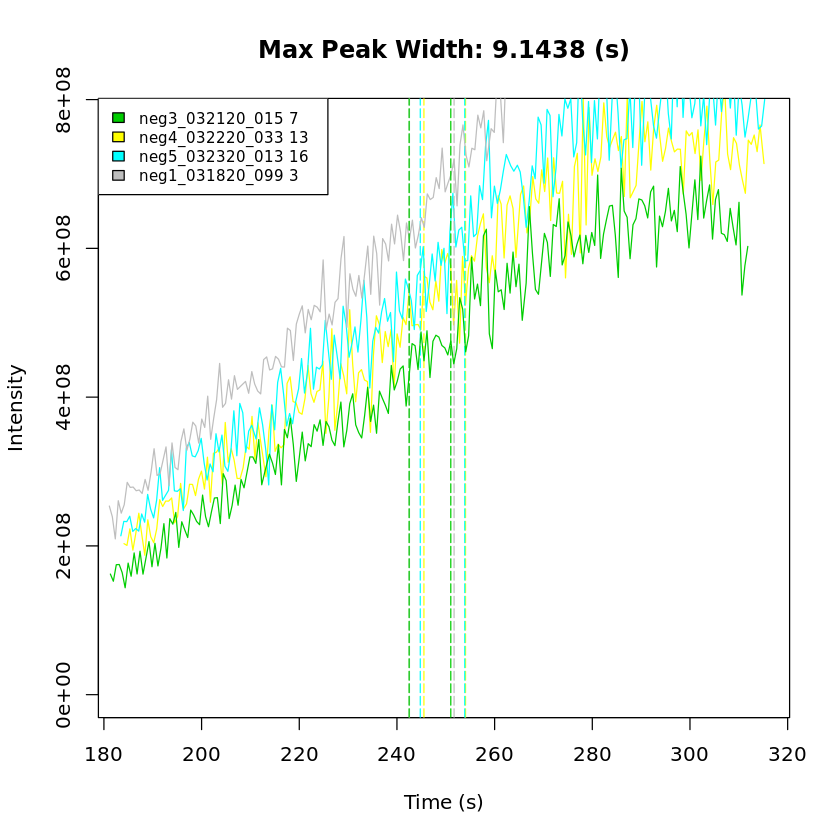

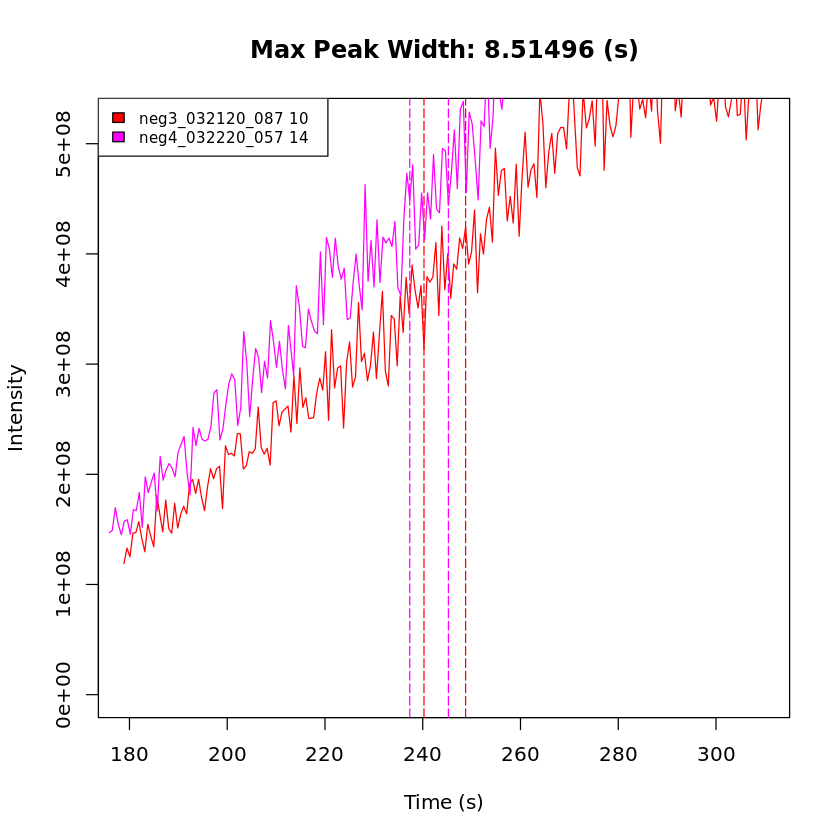

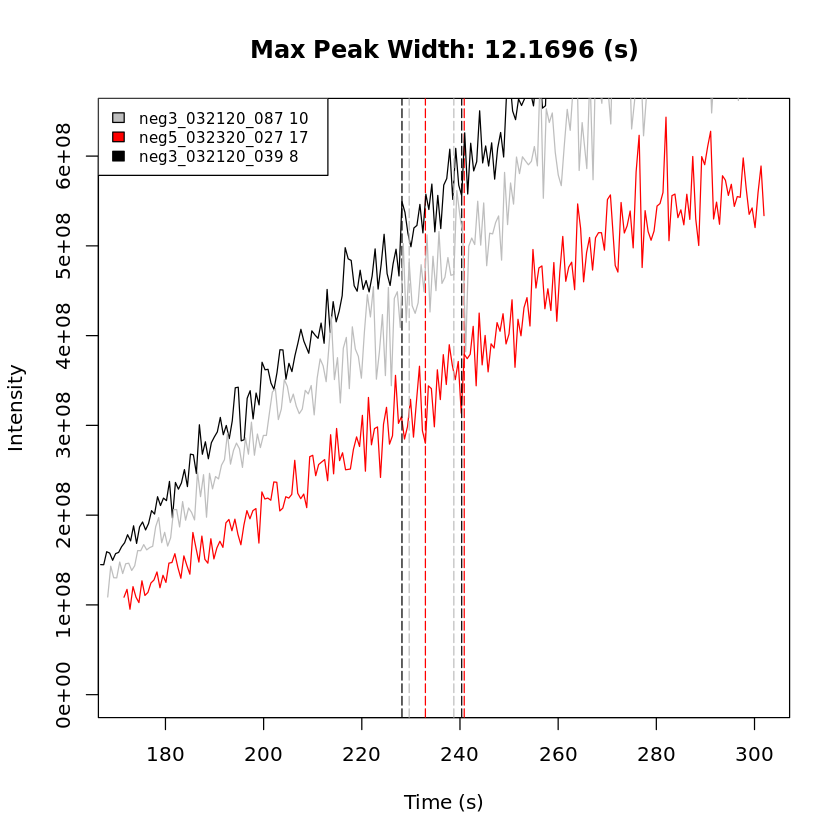

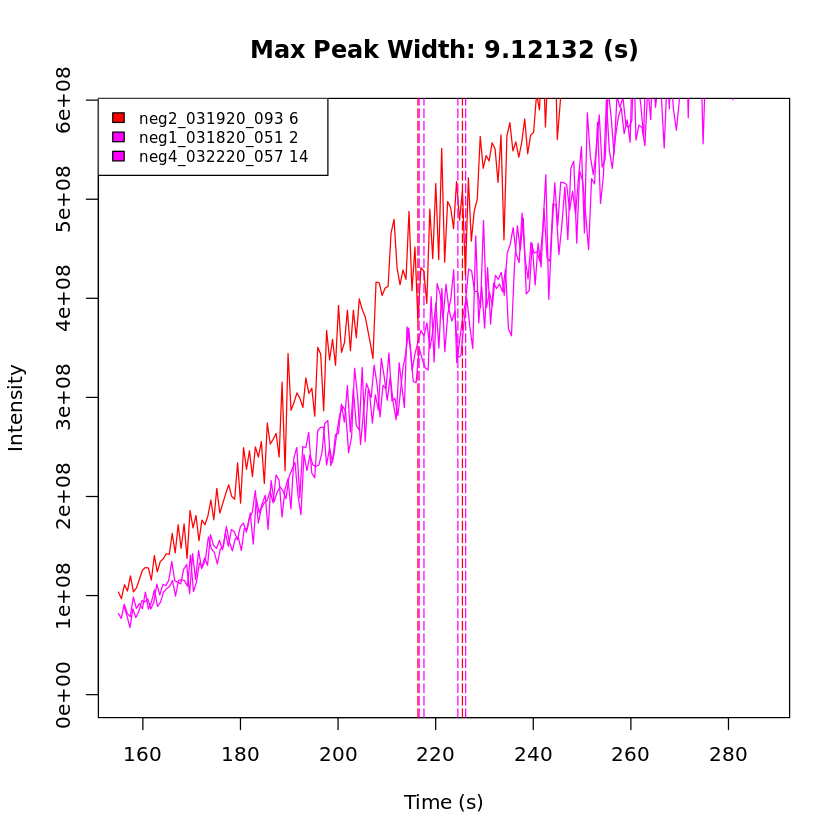

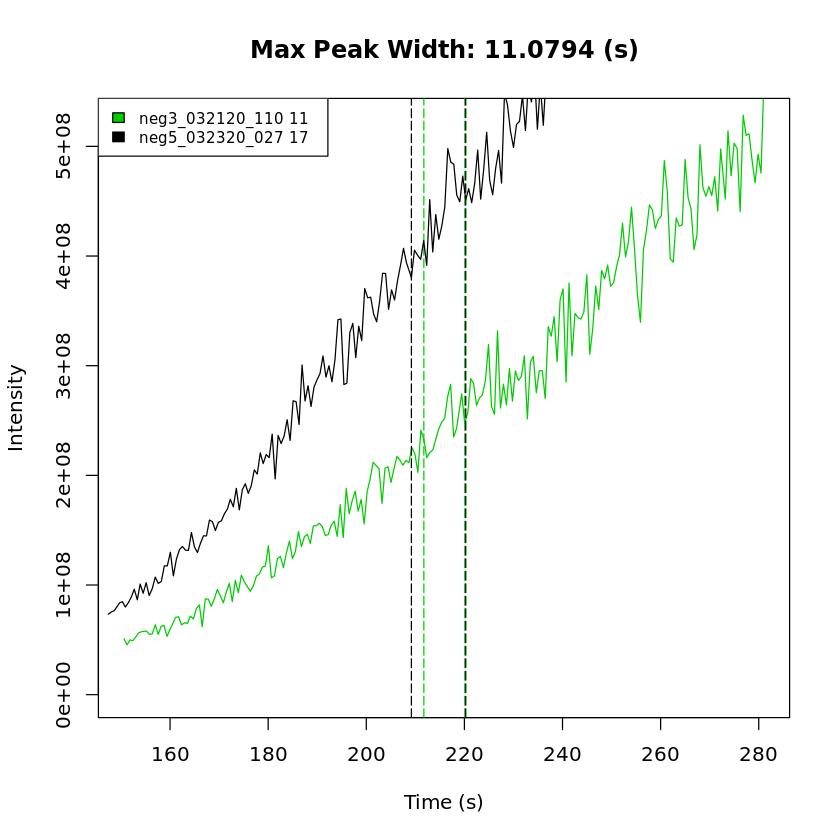

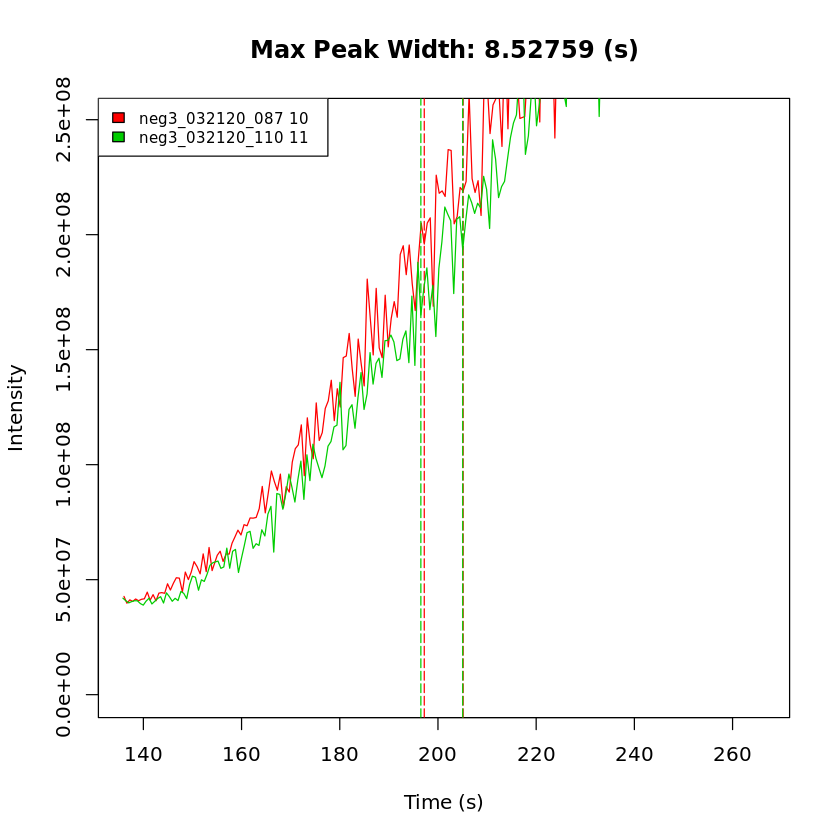

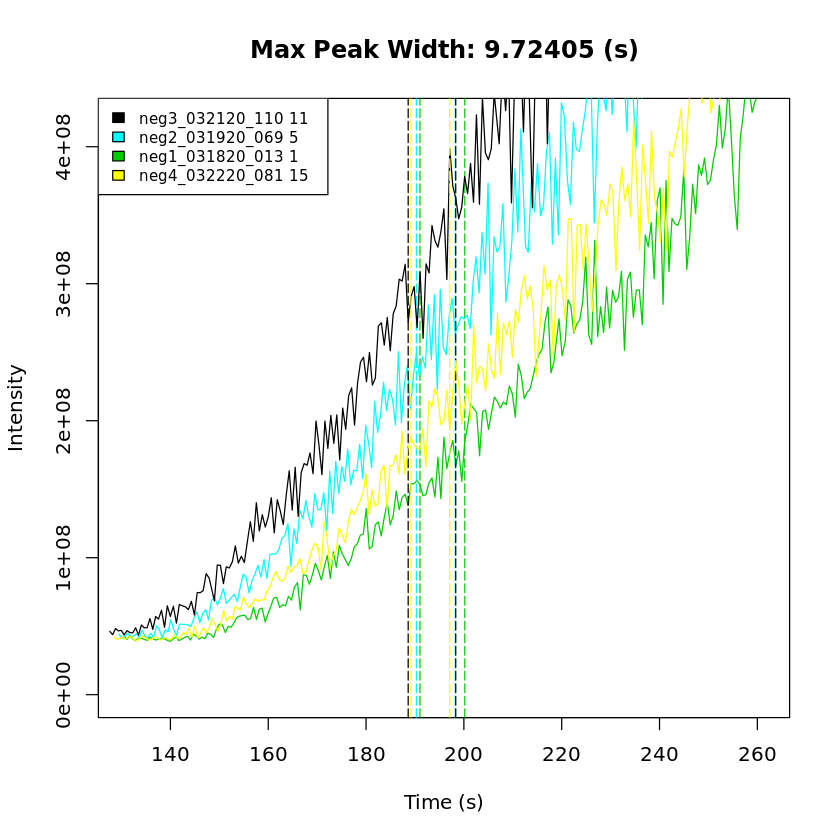

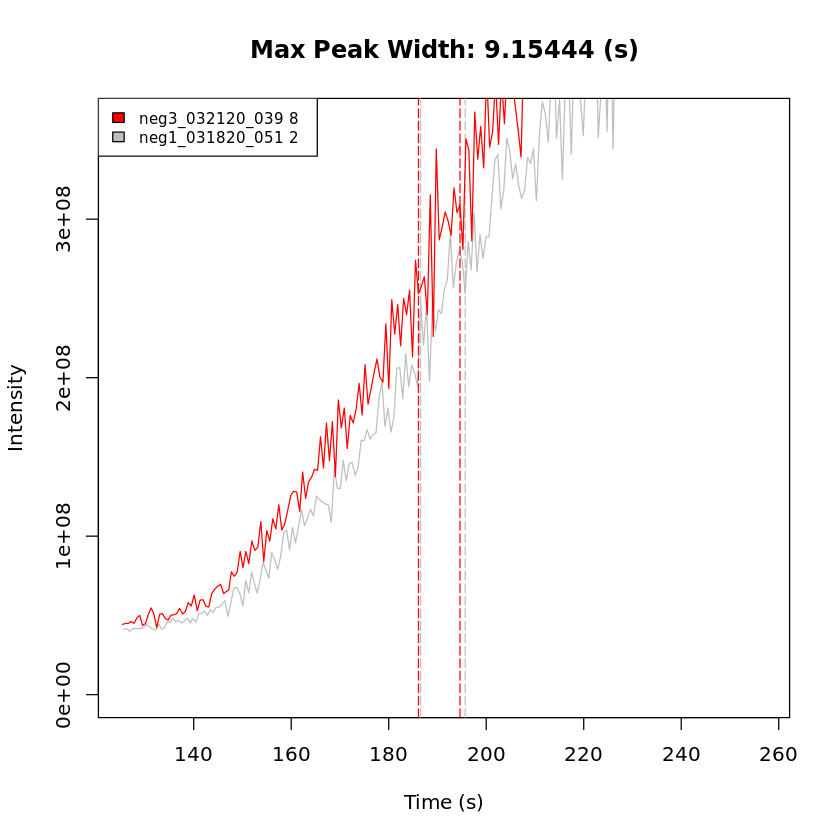

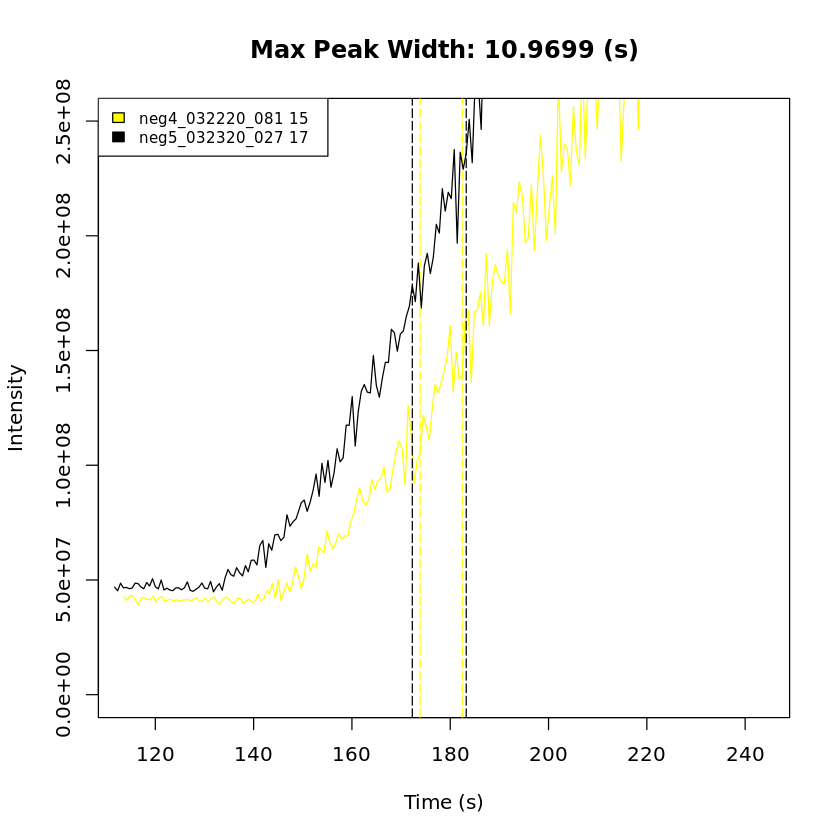

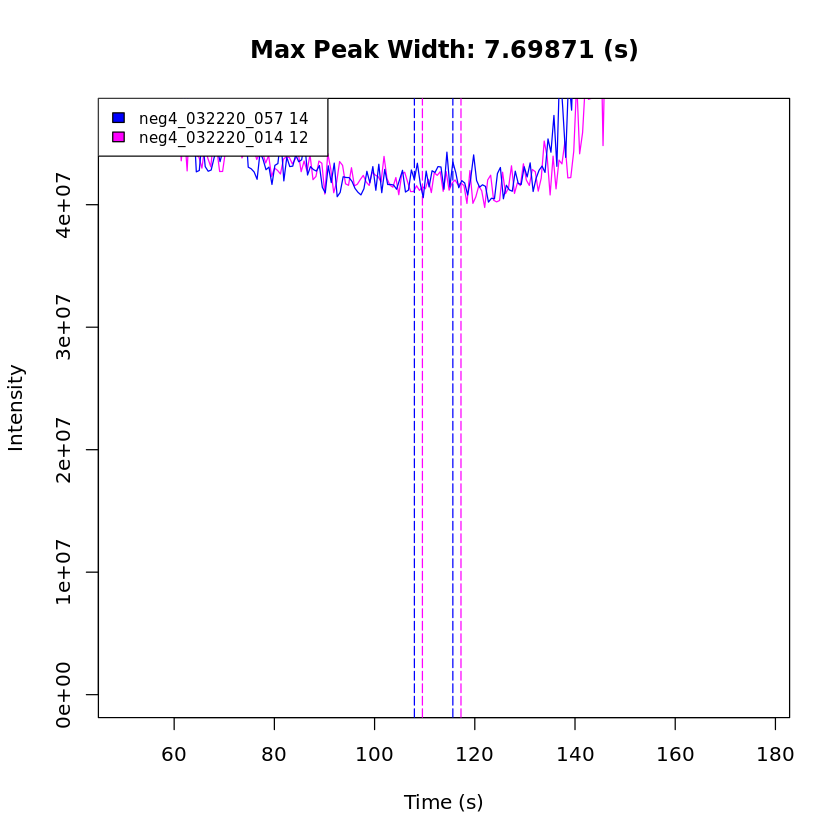

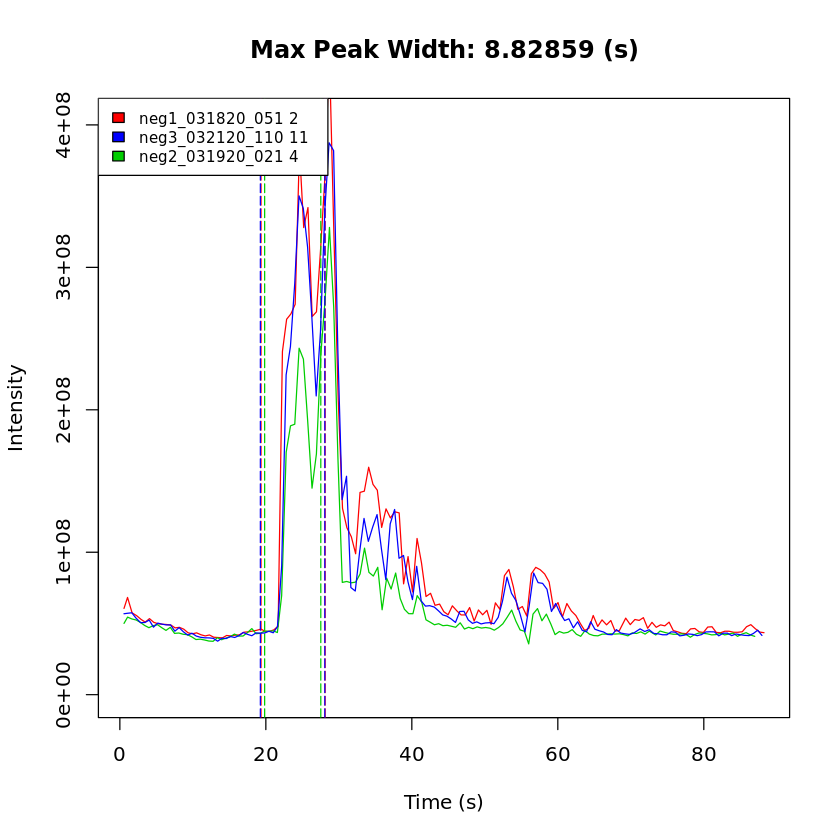

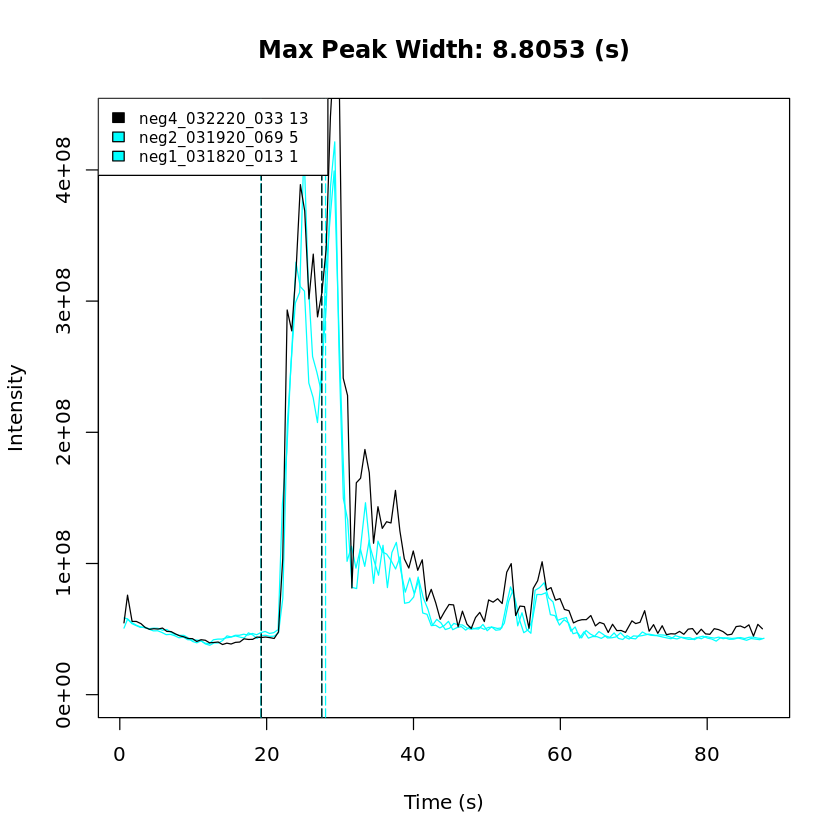

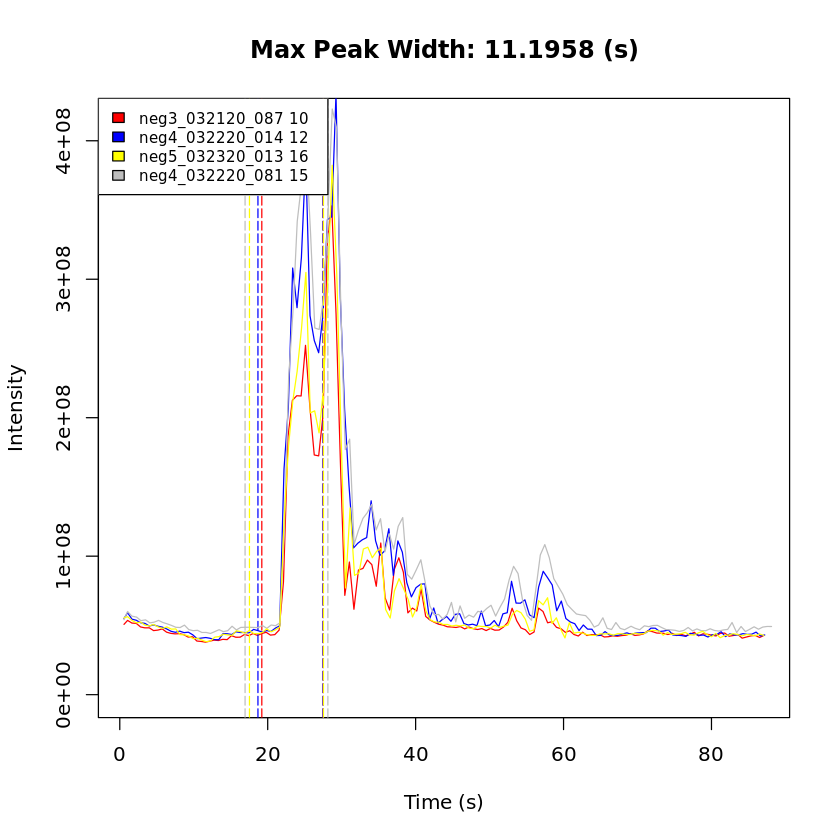

In [45]:
Autotuner <- isolatePeaks(Autotuner = Autotuner, returned_peaks = 10, signals = signals)

for(i in 1:length(rawPaths)) {
  plot_peaks(Autotuner = Autotuner, boundary = 100, peak = i)}

In [46]:
## Parameter extraction from EICs

# error with peak width estimation
system.time(
eicParamEsts <- EICparams(Autotuner = Autotuner, massThresh = .005, verbose = TRUE, returnPpmPlots = TRUE,
                          useGap = TRUE))
autotune_params<-returnParams(eicParamEsts, Autotuner)

Currently on sample 1

--- Currently on peak: 1

-------- Number of bins detected with absolute mass error threshold: 5187

-------- Number of bins retained after checking that features within bins come from consecutive scans: 2158

-------- 42 % of bins retained after checking that features come from consecutive scans

-------- Number of bins with scans with 2+ mass observations: 201

-------- Number of ppm value across bins: 29941

-------- Number of ppm value across bins after KL Distance Filtering: 2500

--- Currently on peak: 2

-------- Number of bins detected with absolute mass error threshold: 4870

-------- Number of bins retained after checking that features within bins come from consecutive scans: 2122

-------- 44 % of bins retained after checking that features come from consecutive scans

-------- Number of bins with scans with 2+ mass observations: 144

-------- Number of ppm value across bins: 27640

-------- Number of ppm value across bins after KL Distance Filtering: 2

-------- Number of bins with scans with 2+ mass observations: 124

-------- Number of ppm value across bins: 25564

-------- Number of ppm value across bins after KL Distance Filtering: 2500

--- Currently on peak: 8

-------- Number of bins detected with absolute mass error threshold: 4564

-------- Number of bins retained after checking that features within bins come from consecutive scans: 2109

-------- 46 % of bins retained after checking that features come from consecutive scans

-------- Number of bins with scans with 2+ mass observations: 288

-------- Number of ppm value across bins: 20889

-------- Number of ppm value across bins after KL Distance Filtering: 2500

--- Currently on peak: 9

-------- Number of bins detected with absolute mass error threshold: 4838

-------- Number of bins retained after checking that features within bins come from consecutive scans: 2309

-------- 48 % of bins retained after checking that features come from consecutive scans

-------- Number of

-------- Number of bins retained after checking that features within bins come from consecutive scans: 2756

-------- 64 % of bins retained after checking that features come from consecutive scans

-------- Number of bins with scans with 2+ mass observations: 220

-------- Number of ppm value across bins: 9159

-------- Number of ppm value across bins after KL Distance Filtering: 2289

--- Currently on peak: 5

-------- Number of bins detected with absolute mass error threshold: 5180

-------- Number of bins retained after checking that features within bins come from consecutive scans: 2292

-------- 44 % of bins retained after checking that features come from consecutive scans

-------- Number of bins with scans with 2+ mass observations: 239

-------- Number of ppm value across bins: 27324

-------- Number of ppm value across bins after KL Distance Filtering: 1250

--- Currently on peak: 6

-------- Number of bins detected with absolute mass error threshold: 5160

-------- Number of 

Currently on sample 6

--- Currently on peak: 1

-------- Number of bins detected with absolute mass error threshold: 4047

-------- Number of bins retained after checking that features within bins come from consecutive scans: 1382

-------- 34 % of bins retained after checking that features come from consecutive scans

-------- Number of bins with scans with 2+ mass observations: 240

-------- Number of ppm value across bins: 26177

-------- Number of ppm value across bins after KL Distance Filtering: 2500

--- Currently on peak: 2

-------- Number of bins detected with absolute mass error threshold: 4874

-------- Number of bins retained after checking that features within bins come from consecutive scans: 2518

-------- 52 % of bins retained after checking that features come from consecutive scans

-------- Number of bins with scans with 2+ mass observations: 209

-------- Number of ppm value across bins: 12100

-------- Number of ppm value across bins after KL Distance Filtering: 2

-------- Number of bins with scans with 2+ mass observations: 142

-------- Number of ppm value across bins: 23644

-------- Number of ppm value across bins after KL Distance Filtering: 1250

--- Currently on peak: 8

-------- Number of bins detected with absolute mass error threshold: 4529

-------- Number of bins retained after checking that features within bins come from consecutive scans: 2087

-------- 46 % of bins retained after checking that features come from consecutive scans

-------- Number of bins with scans with 2+ mass observations: 113

-------- Number of ppm value across bins: 23154

-------- Number of ppm value across bins after KL Distance Filtering: 2500

--- Currently on peak: 9

-------- Number of bins detected with absolute mass error threshold: 4334

-------- Number of bins retained after checking that features within bins come from consecutive scans: 2032

-------- 47 % of bins retained after checking that features come from consecutive scans

-------- Number of

-------- 45 % of bins retained after checking that features come from consecutive scans

-------- Number of bins with scans with 2+ mass observations: 251

-------- Number of ppm value across bins: 25120

-------- Number of ppm value across bins after KL Distance Filtering: 625

--- Currently on peak: 5

-------- Number of bins detected with absolute mass error threshold: 4460

-------- Number of bins retained after checking that features within bins come from consecutive scans: 2057

-------- 46 % of bins retained after checking that features come from consecutive scans

-------- Number of bins with scans with 2+ mass observations: 326

-------- Number of ppm value across bins: 20678

-------- Number of ppm value across bins after KL Distance Filtering: 2500

--- Currently on peak: 6

-------- Number of bins detected with absolute mass error threshold: 4851

-------- Number of bins retained after checking that features within bins come from consecutive scans: 2256

-------- 47 % of bi

-------- Number of bins detected with absolute mass error threshold: 4999

-------- Number of bins retained after checking that features within bins come from consecutive scans: 2280

-------- 46 % of bins retained after checking that features come from consecutive scans

-------- Number of bins with scans with 2+ mass observations: 202

-------- Number of ppm value across bins: 27526

-------- Number of ppm value across bins after KL Distance Filtering: 625

--- Currently on peak: 2

-------- Number of bins detected with absolute mass error threshold: 4539

-------- Number of bins retained after checking that features within bins come from consecutive scans: 1998

-------- 44 % of bins retained after checking that features come from consecutive scans

-------- Number of bins with scans with 2+ mass observations: 108

-------- Number of ppm value across bins: 24049

-------- Number of ppm value across bins after KL Distance Filtering: 2500

--- Currently on peak: 3

-------- Number of 

-------- Number of ppm value across bins: 26017

-------- Number of ppm value across bins after KL Distance Filtering: 1250

--- Currently on peak: 8

-------- Number of bins detected with absolute mass error threshold: 4274

-------- Number of bins retained after checking that features within bins come from consecutive scans: 1957

-------- 46 % of bins retained after checking that features come from consecutive scans

-------- Number of bins with scans with 2+ mass observations: 330

-------- Number of ppm value across bins: 19729

-------- Number of ppm value across bins after KL Distance Filtering: 2500

--- Currently on peak: 9

-------- Number of bins detected with absolute mass error threshold: 4266

-------- Number of bins retained after checking that features within bins come from consecutive scans: 2019

-------- 47 % of bins retained after checking that features come from consecutive scans

-------- Number of bins with scans with 2+ mass observations: 360

-------- Number of

-------- 65 % of bins retained after checking that features come from consecutive scans

-------- Number of bins with scans with 2+ mass observations: 206

-------- Number of ppm value across bins: 8713

-------- Number of ppm value across bins after KL Distance Filtering: 4356

--- Currently on peak: 5

-------- Number of bins detected with absolute mass error threshold: 4849

-------- Number of bins retained after checking that features within bins come from consecutive scans: 2240

-------- 46 % of bins retained after checking that features come from consecutive scans

-------- Number of bins with scans with 2+ mass observations: 356

-------- Number of ppm value across bins: 24239

-------- Number of ppm value across bins after KL Distance Filtering: 2500

--- Currently on peak: 6

-------- Number of bins detected with absolute mass error threshold: 4034

-------- Number of bins retained after checking that features within bins come from consecutive scans: 1883

-------- 47 % of bi

-------- Number of bins detected with absolute mass error threshold: 5553

-------- Number of bins retained after checking that features within bins come from consecutive scans: 2212

-------- 40 % of bins retained after checking that features come from consecutive scans

-------- Number of bins with scans with 2+ mass observations: 286

-------- Number of ppm value across bins: 36749

-------- Number of ppm value across bins after KL Distance Filtering: 1250

--- Currently on peak: 2

-------- Number of bins detected with absolute mass error threshold: 4626

-------- Number of bins retained after checking that features within bins come from consecutive scans: 2189

-------- 47 % of bins retained after checking that features come from consecutive scans

-------- Number of bins with scans with 2+ mass observations: 219

-------- Number of ppm value across bins: 11751

-------- Number of ppm value across bins after KL Distance Filtering: 2500

--- Currently on peak: 3

-------- Number of

-------- Number of ppm value across bins: 9244

-------- Number of ppm value across bins after KL Distance Filtering: 4622

--- Currently on peak: 8

-------- Number of bins detected with absolute mass error threshold: 5074

-------- Number of bins retained after checking that features within bins come from consecutive scans: 2307

-------- 45 % of bins retained after checking that features come from consecutive scans

-------- Number of bins with scans with 2+ mass observations: 293

-------- Number of ppm value across bins: 25176

-------- Number of ppm value across bins after KL Distance Filtering: 2500

--- Currently on peak: 9

-------- Number of bins detected with absolute mass error threshold: 5015

-------- Number of bins retained after checking that features within bins come from consecutive scans: 2340

-------- 47 % of bins retained after checking that features come from consecutive scans

-------- Number of bins with scans with 2+ mass observations: 243

-------- Number of 

    user   system  elapsed 
1478.196    6.678 1488.950 

In [47]:
autotune_params

$eicParams
                 Parameters estimates Variability.Measure
ppm                     ppm     1.373              0.2462
noise                 noise    70.360           4032.0000
preIntensity   preIntensity   229.800           9955.0000
preScan             preScan     2.000              0.0000
snThresh           snThresh     3.000              0.3452
Max Peakwidth Max Peakwidth    14.150              1.3710
Min Peakwidth Min Peakwidth     1.202              0.0000
                                                               Measure
ppm                            Standard Deviation of all PPM Estimates
noise                        Standard Deviation of all noise Estimates
preIntensity  Standard Deviation of all prefileter Intensity Estimates
preScan                 Standard Deviation of all scan coung Estimates
snThresh             Standard Deviation of all s/n threshold Estimates
Max Peakwidth       Distance between two highest estimated peak widths
Min Peakwidth        Distance between two lowest estimated peak widths

$ticParams
           descriptions estimates
max_width     max_width 12.927495
min_width     min_width  7.052983
group_diff   group_diff  3.216612

In [60]:
# Parameters I used originally for pos mode
PPM<-1.4
NOISE<-100
PreIntensity<-900
PreScan<-2
SNTHRESH<-3
maxWidth<-9
minWidth<-3
groupDiff<-1.1

# Parameters from Autotuner
PPM <- round(autotune_params$eicParams$estimates[which(autotune_params$eicParams=="ppm")],digits = 1)
NOISE <- round(autotune_params$eicParams$estimates[which(autotune_params$eicParams=="noise")],digits = 1)
PreIntensity <- round(autotune_params$eicParams$estimates[which(autotune_params$eicParams=="preIntensity")],digits = 1)
PreScan <- round(autotune_params$eicParams$estimates[which(autotune_params$eicParams=="preScan")],digits = 1)
SNTHRESH <- round(autotune_params$eicParams$estimates[which(autotune_params$eicParams=="snThresh")],digits = 1)
maxWidth <- round(autotune_params$eicParams$estimates[which(autotune_params$eicParams=="Max Peakwidth")],digits = 1)
minWidth <- round(autotune_params$eicParams$estimates[which(autotune_params$eicParams=="Min Peakwidth")],digits = 1)
groupDiff <- round(autotune_params$ticParams$estimates[which(autotune_params$ticParams=="group_diff")],digits = 1)

NOISE <- 100
PreIntensity <- 500

save(list=c("PPM","NOISE","PreIntensity","PreScan","SNTHRESH","maxWidth","minWidth","groupDiff"),
     file=paste0("autotuneparams_",ionMode,".RData"))

In [3]:
## Check if you're happy with the peak picking parameters:

usePath <- "/vortexfs1/omics/kujawinski/data/biosscope_untarg_mzml"
ext <- ".mzML"
#ionMode <- "neg"
pre <- paste0(usePath,"/")
raw_files <- list.files(usePath,recursive = FALSE, full.names=TRUE, pattern=glob2rx(paste0("*",ionMode,"*",ext)))

# subset raw files
raw_files <- raw_files[which(gsub(".mzML","",basename(raw_files)) %in% metadata$File.Name)]
raw_files <- raw_files[seq(1, length(raw_files), 4)]
raw_files
metadata <- metadata[which(metadata$File.Name %in% gsub(".mzML","",basename(raw_files))),]
metadata
# Read in file as an OnDiskMsnExp object
raw_data <- readMSData(files=raw_files,pdata = new("NAnnotatedDataFrame",metadata) ,mode="onDisk")
raw_data

[1] "/vortexfs1/omics/kujawinski/data/biosscope_untarg_mzml/mtab_BIOSSCOPE_exometab_neg1_031820_013.mzML"
[2] "/vortexfs1/omics/kujawinski/data/biosscope_untarg_mzml/mtab_BIOSSCOPE_exometab_neg2_031920_069.mzML"
[3] "/vortexfs1/omics/kujawinski/data/biosscope_untarg_mzml/mtab_BIOSSCOPE_exometab_neg3_032120_063.mzML"
[4] "/vortexfs1/omics/kujawinski/data/biosscope_untarg_mzml/mtab_BIOSSCOPE_exometab_neg4_032220_033.mzML"
[5] "/vortexfs1/omics/kujawinski/data/biosscope_untarg_mzml/mtab_BIOSSCOPE_exometab_neg5_032320_027.mzML"

,Sample.Type,File.Name,Path,Instrument.Method,Position,Inj.Vol,Sample.Name,ionMode,goodData,FileWithExtension,Sample
,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<chr>
1,Unknown,mtab_BIOSSCOPE_exometab_neg1_031820_013,D:\Kujawinski_FTMSFUSION2\2020_0318 BIOSSCOPE_exometab_neg1,C:\Xcalibur\methods\Training\UPLC_neg_HCD_OT_062018_noIC_MS2_7p5k,B:A3,5,BIOSSCOPE pool neg,neg,1,mtab_BIOSSCOPE_exometab_neg1_031820_013.mzML,neg1_031820_013
162,Unknown,mtab_BIOSSCOPE_exometab_neg2_031920_069,D:\Kujawinski_FTMSFUSION2\2020_0319 BIOSSCOPE_exometab_neg2,C:\Xcalibur\methods\Training\UPLC_neg_HCD_OT_062018_noIC_MS2_7p5k,B:A3,5,BIOSSCOPE pool neg,neg,1,mtab_BIOSSCOPE_exometab_neg2_031920_069.mzML,neg2_031920_069
261,Unknown,mtab_BIOSSCOPE_exometab_neg3_032120_063,D:\Kujawinski_FTMSFUSION2\2020_0321 BIOSSCOPE_exometab_neg3,C:\Xcalibur\methods\Training\UPLC_neg_HCD_OT_062018_noIC_MS2_7p5k,B:A3,5,BIOSSCOPE pool neg,neg,1,mtab_BIOSSCOPE_exometab_neg3_032120_063.mzML,neg3_032120_063
336,Unknown,mtab_BIOSSCOPE_exometab_neg4_032220_033,D:\Kujawinski_FTMSFUSION2\2020_0322 BIOSSCOPE_exometab_neg4,C:\Xcalibur\methods\Training\UPLC_neg_HCD_OT_062018_noIC_MS2_7p5k,B:A3,5,BIOSSCOPE pool neg,neg,1,mtab_BIOSSCOPE_exometab_neg4_032220_033.mzML,neg4_032220_033
435,Unknown,mtab_BIOSSCOPE_exometab_neg5_032320_027,D:\Kujawinski_FTMSFUSION2\2020_0323 BIOSSCOPE_exometab_neg5,C:\Xcalibur\methods\Training\UPLC_neg_HCD_OT_062018_noIC_MS2_7p5k,B:A3,5,BIOSSCOPE pool neg,neg,1,mtab_BIOSSCOPE_exometab_neg5_032320_027.mzML,neg5_032320_027


MSn experiment data ("OnDiskMSnExp")
Object size in memory: 1.82 Mb
- - - Spectra data - - -
 MS level(s): 1 
 Number of spectra: 4975 
 MSn retention times: 0:1 - 9:60 minutes
- - - Processing information - - -
Data loaded [Tue Apr 14 14:36:47 2020] 
 MSnbase version: 2.12.0 
- - - Meta data  - - -
phenoData
  rowNames: 1 162 ... 435 (5 total)
  varLabels: Sample.Type File.Name ... Sample (11 total)
  varMetadata: labelDescription
Loaded from:
  [1] mtab_BIOSSCOPE_exometab_neg1_031820_013.mzML...  [5] mtab_BIOSSCOPE_exometab_neg5_032320_027.mzML
  Use 'fileNames(.)' to see all files.
protocolData: none
featureData
  featureNames: F1.S001 F1.S002 ... F5.S994 (4975 total)
  fvarLabels: fileIdx spIdx ... spectrum (35 total)
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'

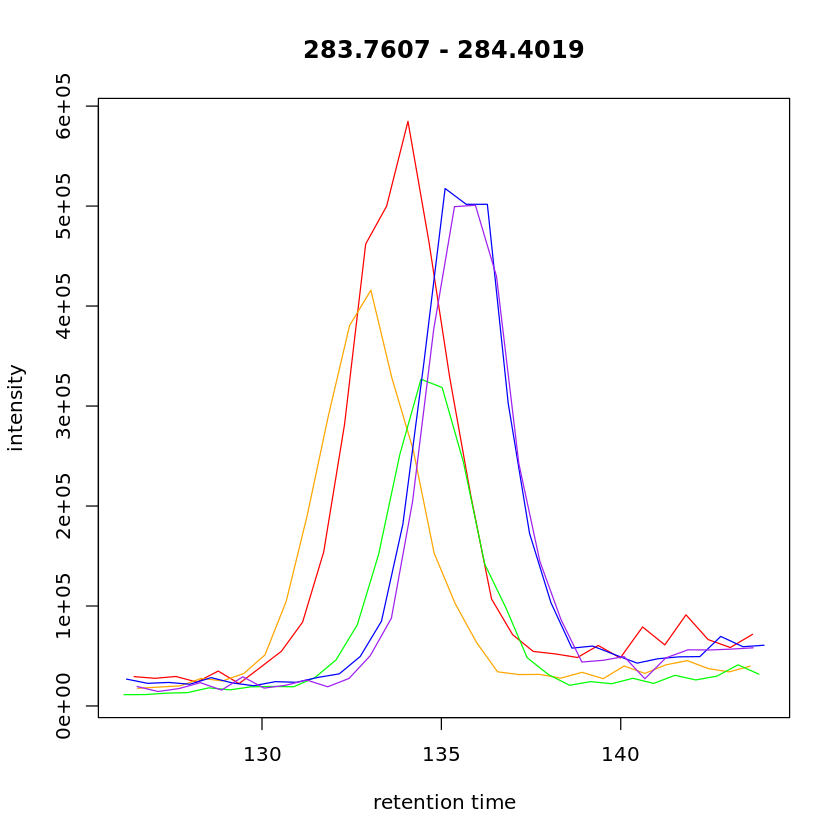

In [10]:
# guanosine
rtr <- c(2.1,2.4)*60
mzr <- c(283.5,284.5)
batch_colors <- c("red","orange","green","blue","purple")
chr_raw <- chromatogram(raw_data, mz = mzr, rt = rtr)
plot(chr_raw, col = batch_colors)

raw_data %>%
   filterRt(rt = rtr) %>%
   filterMz(mz = mzr) %>%
   plot(type = "XIC")

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


rt,rtmin,rtmax,into,intb,maxo,sn,egauss,mu,sigma,⋯,f,dppm,scale,scpos,scmin,scmax,lmin,lmax,row,column


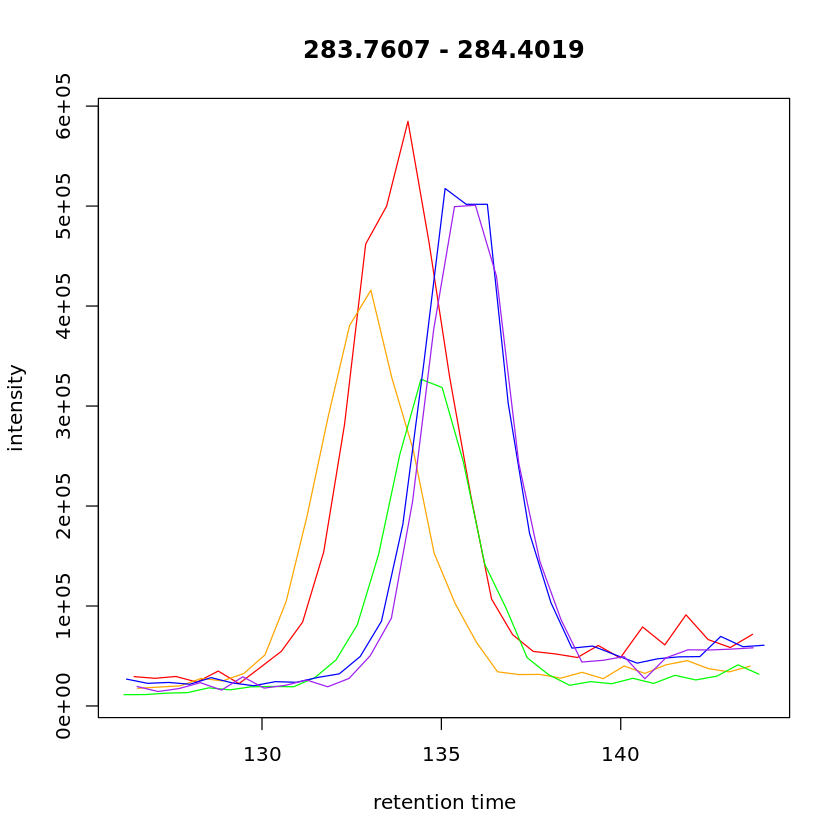

In [38]:
#load("autotuneparams_neg.RData")
#cwp <- CentWaveParam(peakwidth = c(minWidth, maxWidth), noise = NOISE, ppm = PPM,
#            mzCenterFun = "wMean", prefilter = c(PreScan,PreIntensity),integrate = 2,mzdiff = -0.005, 
#            fitgauss = TRUE, snthresh = SNTHRESH,verboseColumns=TRUE)
#xchr <- findChromPeaks(chr_raw, param = cwp)
#save(list=c("xchr"),file="xchr_tmp.RData")

load("xchr_tmp.RData")
plot(xchr, col = batch_colors,peakBg = batch_colors[chromPeaks(xchr)[, "column"]])

head(chromPeaks(xchr))